In [11]:
import torch

In [12]:
cd ~/pytorch-classification/

/home/amir/pytorch-classification


# Slicing a filter along different dimensions.


In [13]:
import os
%pylab inline
import pandas as pd
# Let's try to train a fraction of the parameters.
#import os
homedir = os.path.expanduser('~')

def make_checkpoint_path(ckpt_base_dir,arch,frac,iter_,my_optimizer,subsample,kill_fixed,dataset='cifar10',train_only='train_all',
                        learn_bn=True,dim_slice=0):
    P = arch_to_name_prefix[arch]
    checkpointPath = os.path.join(ckpt_base_dir,
                                  '{f_arch}_{bb}_iter_{iter_}_opt_{opt}_subsample_{s}'.
                                  format(f_arch=P,bb=frac,iter_=iter_,opt=my_optimizer,s=subsample))
    if kill_fixed:
        checkpointPath += '_zero_fixed'
        
    #if frac >= 1:# a fixed integer amount of filters.
    #    checkpointPath += '_I'
    if dataset != 'cifar10':
        checkpointPath += '_C100'
        
    if fast_schedule:
        checkpointPath += '_FS'        
        
    if train_only!='train_all':
        checkpointPath += '_only_{}'.format(train_only)
    if not learn_bn:
        checkpointPath += '_no-bn'
    if dim_slice != 0:
        checkpointPath += '_DS_{}'.format(dim_slice)
    return checkpointPath

Populating the interactive namespace from numpy and matplotlib


In [14]:
df_state=pd.DataFrame(opts_with_state)
df_state[df_state.ok==False]

NameError: name 'opts_with_state' is not defined

In [7]:
df_state[df_state.ok==False].count()

NameError: name 'df_state' is not defined

In [8]:
df_state[(df_state.dataset=='cifar10') & (df_state.arch=='wrn_partial') & (df_state.ok==True)]

NameError: name 'df_state' is not defined

In [9]:
df = pd.DataFrame(ddd)

NameError: name 'ddd' is not defined

In [10]:
df[df.dataset=='cifar100'].sort_values('valid_acc',ascending=False)

NameError: name 'df' is not defined

In [10]:
df.valid_acc.max()

96.1

In [11]:
len(df)

104

In [12]:
df = pd.DataFrame(ddd)
df = df[((df.frac==1) ) & (df.dataset=='cifar100')].sort_values('arch')
df['z']=100*(df.active_params/df.total_params)
df

,active_params,all_accs,arch,dataset,dim_slice,fast_schedule,frac,kill_fixed,learn_bn,optimizer,total_params,train_only,valid_acc,z
85,35156,0 1.32 1 1.88 2 3.60 3 ...,alexnet_partial,cifar100,0,False,1.0,False,True,sgd,2495396,train_all,17.20,1.408835
87,35156,0 1.0 1 1.0 2 1.0 3 1.0 4 ...,alexnet_partial,cifar100,0,False,1.0,True,True,sgd,2495396,train_all,1.00,1.408835
73,88399,0 14.61 1 20.90 2 24.93 3 ...,densenet_partial,cifar100,0,False,1.0,False,True,sgd,800032,train_all,59.73,11.049433
75,88399,0 4.44 1 6.96 2 8.47 3 ...,densenet_partial,cifar100,0,False,1.0,True,True,sgd,800032,train_all,19.24,11.049433
81,107279,0 10.92 1 14.18 2 15.89 3 ...,vgg19_bn_partial,cifar100,0,False,1.0,False,True,sgd,20086692,train_all,41.02,0.534080
83,107279,0 2.44 1 2.38 2 2.67 3 1.8...,vgg19_bn_partial,cifar100,0,False,1.0,True,True,sgd,20086692,train_all,3.44,0.534080
77,157599,0 3.75 1 5.75 2 5.26 3 ...,wrn_partial,cifar100,0,False,1.0,False,True,sgd,36536884,train_all,34.85,0.431342
79,157599,0 1.97 1 2.11 2 2.35 3 2.4...,wrn_partial,cifar100,0,False,1.0,True,True,sgd,36536884,train_all,3.43,0.431342


In [13]:
# plot performance vs fraction.

In [14]:
df[df.arch=='alexnet_partial'].sort_values('valid_acc',ascending=False)

,active_params,all_accs,arch,dataset,dim_slice,fast_schedule,frac,kill_fixed,learn_bn,optimizer,total_params,train_only,valid_acc,z
85,35156,0 1.32 1 1.88 2 3.60 3 ...,alexnet_partial,cifar100,0,False,1.0,False,True,sgd,2495396,train_all,17.2,1.408835
87,35156,0 1.0 1 1.0 2 1.0 3 1.0 4 ...,alexnet_partial,cifar100,0,False,1.0,True,True,sgd,2495396,train_all,1.0,1.408835


In [15]:
df = pd.DataFrame(ddd)
df.loc[df.groupby('arch')['valid_acc'].idxmax()].sort_values('valid_acc')

,active_params,all_accs,arch,dataset,dim_slice,fast_schedule,frac,kill_fixed,learn_bn,optimizer,total_params,train_only,valid_acc
68,1727890,0 38.16 1 47.37 2 48.71 3 ...,alexnet_partial,cifar10,0,False,0.7,False,True,sgd,2472266,train_all,75.26
36,20040522,0 11.10 1 11.65 2 25.81 3 ...,vgg19_bn_partial,cifar10,0,False,-1.0,False,True,sgd,20040522,train_all,92.85
32,769162,0 56.76 1 68.81 2 74.09 3 ...,densenet_partial,cifar10,0,False,-1.0,False,True,sgd,769162,train_all,95.35
34,36479194,0 52.08 1 60.38 2 62.54 3 ...,wrn_partial,cifar10,0,False,-1.0,False,True,sgd,36479194,train_all,96.10


In [15]:
sns.set_style('ticks')
sns.set_context('paper',font_scale=2)
df = pd.DataFrame(ddd)
#df['frac'] = df['frac'].round(2)
#df=df[df.arch!='vgg19_partial']
df=df[df.optimizer=='sgd']
#df['abs_filters']=df.frac>=1
df.sort_values('frac')
if LIMIT_EPOCHS != 1:    
  #  df = df[df.frac>0]
    df = df[df.learn_bn==True]
    #df = df[df.arch=='wrn_partial']
    
    #df = df[df.arch.str.contains('wrn') | (df.arch.str.contains('dense'))]
    #df = df[df.frac<1]
    #df = df[df.frac>0]
    #df = df[df.kill_fixed==False]  
    #theHue = 'learn_bn' # kill_fixed
    theHue = 'kill_fixed'
else:
    #df = df[df.frac>0]        
    df = df[df.kill_fixed==False]
    theHue = 'learn_bn'        
#sns.factorplot(data=df,x='frac',y='valid_acc',hue='kill_fixed',col='arch')
g=sns.factorplot(data=df,x='frac',y='valid_acc',col='dataset',hue='arch',legend_out=False)
g.set_xticklabels(rotation=-50)
axes_ = list(g.axes[0])
theAlpha=.8
ZZ = 5
ZZ0 = -.5
axes_[0].plot([ZZ0,ZZ],2*[96.2],color='g',linestyle='--',alpha=theAlpha)
axes_[0].plot([ZZ0,ZZ],2*[100-4.54],color='blue',linestyle='--',alpha=theAlpha)

axes_[1].plot([ZZ0,ZZ],2*[100- 18.14],color='g',linestyle='--',alpha=theAlpha)
axes_[1].plot([ZZ0,ZZ],2*[100-22.88],color='blue',linestyle='--',alpha=theAlpha) #

#axes_[1].plot([-1,9],2*[96.2],color='g',linestyle='--')
#axes_[1].plot([-1,9],2*[100-4.54],color='r',linestyle='--')
#suptitle(z.upper(),y=1)    
#for ax in list(g.axes[0]):
#    ax.add_patch(patches.Rectangle(xy=(6, 0), width=4, height=100,alpha=.1,color='k'))
    #df = pd.DataFrame(ddd)
    #z = df[(df.frac==-1) &(df.train_only=='train_all') & (df.learn_bn==True) & (df.kill_fixed==False) &\
    #      (df.dataset==z)]
    #ax.plot([-1,9],2*[zs[iz]],color='k',linestyle='--')
    #iz+=1
       
#savefig('/home/amir/Dropbox/publications/2018/icml2018_style/figures/frac_vs_perf_full_run.pdf')

NameError: name 'sns' is not defined

In [17]:
100-df[(df.dataset=='cifar100') & (df.arch=='alexnet_partial')].valid_acc.max()

55.21

In [18]:
df1.keys()

NameError: name 'df1' is not defined

(90, 100)

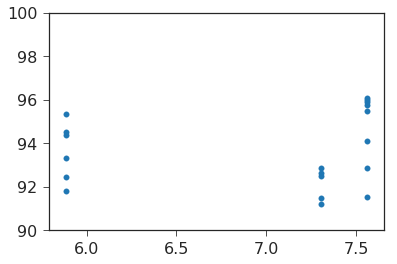

In [19]:
df1 = df[df.dataset=='cifar10']
scatter(log10(df1.total_params),df1.valid_acc)
ylim([90,100])

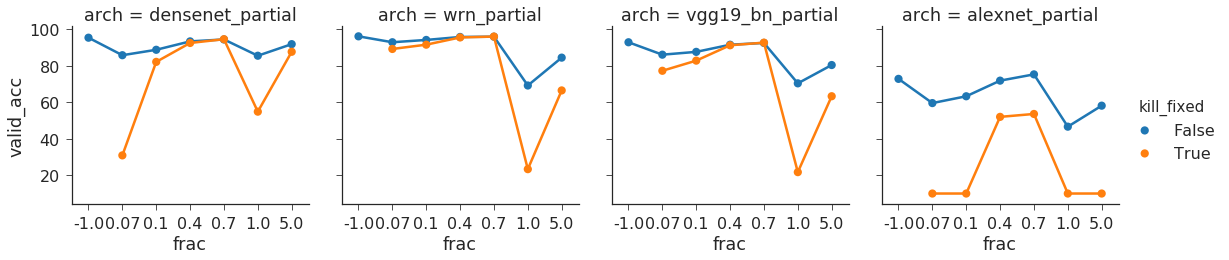

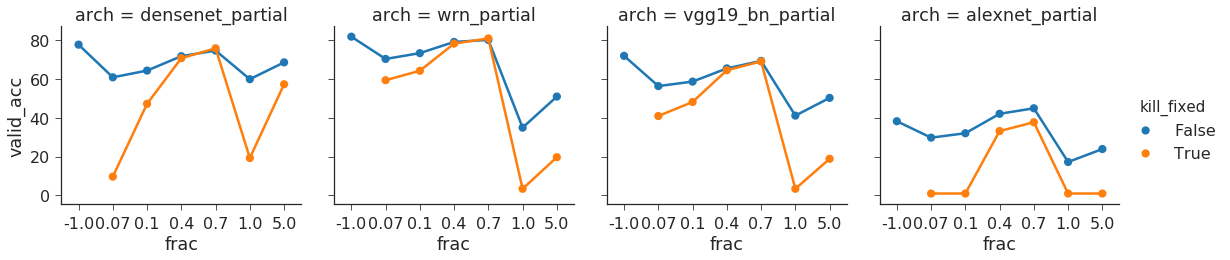

In [20]:
sns.factorplot(data=df[df.dataset=='cifar10'],x='frac',y='valid_acc',col='arch',hue='kill_fixed')
sns.factorplot(data=df[df.dataset=='cifar100'],x='frac',y='valid_acc',col='arch',hue='kill_fixed')

In [21]:
df[(df.kill_fixed==True) & (df.dataset=='cifar10') & (df.arch=='wrn_partial')].plot(x='active_params',y='valid_acc',hue)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-21-36c46fd0254d>, line 1)

In [ ]:
g=sns.factorplot(data=df,x='frac',y='valid_acc',col='dataset',hue='arch',legend_out=False)


In [22]:
# train imagenet.
# (wideresnet)
python cifar.py -a wideresnet --dataset small_imagenet --epochs 80 --schedule 41 71 --gamma 0.1 --weight-decay 1e-4 -c /home/amir/checkpoints/small_imagenet/wrn_full_F --train-batch 128

SyntaxError: invalid syntax (<ipython-input-22-21e7bc3872e7>, line 3)

In [ ]:
python cifar.py -a wideresnet_partial --part .1 --dataset small_imagenet --epochs 80 --schedule 41 71 --gamma 0.1 --weight-decay 1e-4 -c /home/amir/checkpoints/small_imagenet/wrn_partial_0.1 --train-batch 128

In [ ]:
python cifar.py -a wideresnet_partial --part .1 --dataset small_imagenet --epochs 80 --schedule 41 71 --gamma 0.1 --weight-decay 1e-4 -c /home/amir/checkpoints/small_imagenet/wrn_partial_0.1_kill --train-batch 128 --zero-fixed-part True

In [ ]:
python cifar.py -a wideresnet_partial --part .4 --dataset small_imagenet --epochs 80 --schedule 41 71 --gamma 0.1 --weight-decay 1e-4 -c /home/amir/checkpoints/small_imagenet/wrn_partial_0.4 --train-batch 128